In [22]:
import seaborn as sns
import pandas as pd

infile = "../img/latenciesIoT.pkl"
outfile = "../img/2023_iot_latencies.pdf"

print("Setup done.")

Setup done.


In [23]:
sns.set_context("paper")
colors = sns.color_palette("Greys", 5)
sns.set_palette(colors)
sns.set_style("whitegrid")
print("sns initialized.")

sns initialized.


In [24]:
df_calls = pd.read_pickle(infile)
df_calls.head()

,pair,latency,platform,start
0,movementplan - setlightphasecalculation,98.196781,tinyfaas - google,2023-06-20 09:40:10.725
1,emergencydetection - setlightphasecalculation,82.214347,tinyfaas - google,2023-06-20 09:40:08.409
2,objectrecognition - trafficstatistics,78.863912,tinyfaas - google,2023-06-20 09:40:08.280
3,movementplan - setlightphasecalculation,90.580752,tinyfaas - google,2023-06-20 09:40:09.571
4,emergencydetection - setlightphasecalculation,80.699677,tinyfaas - google,2023-06-20 09:40:09.374


In [25]:
rename = [
    ["tinyfaas - google","tinyFaaS → GCP"],
    ["tinyfaas - aws","tinyFaaS → AWS"],
    ["tinyfaas - azure","tinyFaaS → Azure"],
    ["movementplan - setlightphasecalculation","Movement Plan\n-\nLight Phase"],
    ["emergencydetection - setlightphasecalculation","Emergency\n-\nLight Phase"],
    ["objectrecognition - trafficstatistics","Object Recognition\n-\nStatistics"],
]

for tuple in rename:
    print(f"old:{tuple[0]}, new:{tuple[1]}")
    df_calls.replace(to_replace=tuple[0],value=tuple[1],inplace=True)

df_calls.head()

old:tinyfaas - google, new:tinyFaaS → GCP
old:tinyfaas - aws, new:tinyFaaS → AWS
old:tinyfaas - azure, new:tinyFaaS → Azure
old:movementplan - setlightphasecalculation, new:Movement Plan
-
Light Phase
old:emergencydetection - setlightphasecalculation, new:Emergency
-
Light Phase
old:objectrecognition - trafficstatistics, new:Object Recognition
-
Statistics


,pair,latency,platform,start
0,Movement Plan\n-\nLight Phase,98.196781,tinyFaaS → GCP,2023-06-20 09:40:10.725
1,Emergency\n-\nLight Phase,82.214347,tinyFaaS → GCP,2023-06-20 09:40:08.409
2,Object Recognition\n-\nStatistics,78.863912,tinyFaaS → GCP,2023-06-20 09:40:08.280
3,Movement Plan\n-\nLight Phase,90.580752,tinyFaaS → GCP,2023-06-20 09:40:09.571
4,Emergency\n-\nLight Phase,80.699677,tinyFaaS → GCP,2023-06-20 09:40:09.374


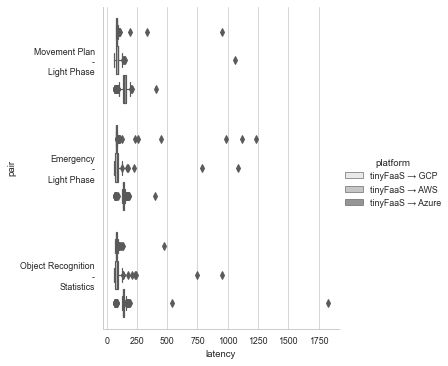

In [26]:
plot = sns.catplot(x = "latency", y = "pair", hue="platform", kind="box", data=df_calls, orient="h")

In [27]:
#Build order
classes = ["tinyFaaS → AWS", "tinyFaaS → Azure","tinyFaaS → GCP"]
myorder = ["Movement Plan\n-\nLight Phase",
           "Emergency\n-\nLight Phase",
           "Object Recognition\n-\nStatistics",
           ]



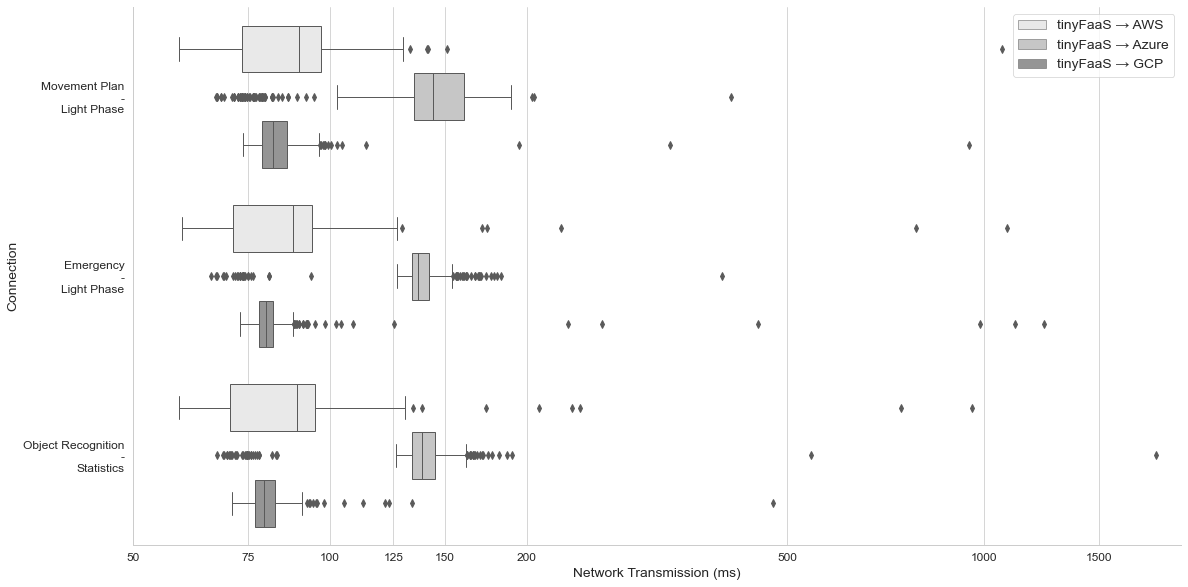

In [28]:

plot = sns.catplot(x = "latency", y = "pair", hue="platform", kind="box", data=df_calls,
                   height=8, aspect=2, legend=False, linewidth=1,
                   hue_order=classes, order=myorder, orient="h")

plot.set_xlabels(label = "Network Transmission (ms)", fontsize="x-large")
plot.set_ylabels(label = "Connection", fontsize="x-large")
plot.set_yticklabels(size = 12)
plot.ax.set(xscale="log")
plot.ax.set_xticks([0, 50, 75, 100, 125, 150, 200, 500, 1000, 1500])
plot.set_xticklabels([0, 50, 75, 100, 125, 150, 200, 500, 1000, 1500], size = 12)
plot.set(xlim=(50, 2000))


plot.ax.legend(loc=0, fontsize="x-large")
plot.savefig(outfile)